In [17]:
import pandas as pd
from Bio.Seq import Seq
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

from scipy.stats import pearsonr

# Ignore all warnings
warnings.filterwarnings('ignore')

In [2]:
js_activities = pd.read_csv("../data/Sog1_library2_activities_with_reads.csv")
ec_activities = pd.read_csv("../data/Sog1_library2_activities_with_reads_ECspike.csv")
#activities = pd.read_csv("../data/Sog1_library2_activities_with_reads_EC.csv")

In [3]:
js_activities

,ArrayDNA,Activity_GFP8,Activity_S3_1,Activity_S3_2,reads_S3_1,reads_S3_2,AAseq,lib2_avg,lib2_std
0,GAAGATCCAACTTGGTTTGATTCTGGTTCTCAATTTATCTTAAATT...,636.156202,614.613867,944.856101,6448.0,115.0,EDPTWFDSGSQFILNSQQLVEALSLCDDAAGSQDREENTN,779.734984,233.516523
1,GAAGCTTTGTCTTTGTGTGATGATTTGTTGGGTGATCAAGATAGAG...,602.696194,541.936177,992.565641,10829.0,1680.0,EALSLCDDLLGDQDREENDNDGDLKDKQPCIADYAHLGPE,767.250909,318.643150
2,GATTTGGCTGAAGATGATGAAGTTATGTGTATGGAAGATGAAGTTC...,381.502348,390.255889,390.758385,91062.0,892.0,DLAEDDEVMCMEDEVQSIQPNHERPDDGPELEHGLENGAK,390.507137,0.355319
3,GGTCAAAGGAAGAGAAGGAAGATTACTCCAACTTTGGTTAATGATG...,347.155741,430.848450,865.176167,13900.0,140.0,GQRKRRKITPTLVNDEPVRWHKTGRTKPVMLSGVQRGCKK,648.012309,307.116074
4,TCTGAATTGACTTCTACTTTGGGTATTTCTCATAGATTGCCACAAT...,437.694050,470.823534,3562.821795,10128.0,246.0,SELTSTLGISHRLPQSLTPCVKTGSLQSGGLVQSVPFEEL,2016.822664,2186.372938
...,...,...,...,...,...,...,...,...,...
10304,TTGGAACATGGTTTGGAAAGAGGTGCTAAAGAAATGTTGGATGATA...,NaN,NaN,3570.989020,NaN,11.0,LEHGLERGAKEMLDDKEEREKDRDRERRGEEDPTWFDSGS,3570.989020,NaN
10305,GAAGATGAAGAATGGTTTGATGAAGAAGCTCAATTTATCTTGAATG...,NaN,NaN,3330.752810,NaN,13.0,EDEEWFDEEAQFILNAQQLVEALSLCDDLLGAQDREEEEN,3330.752810,NaN
10306,ACTCAATCTCAATCTTCTAGATCTAGAAATATTCCACCACCACAAG...,NaN,NaN,5347.917675,NaN,11.0,TQSQSSRSRNIPPPQANSSRAREIGNGSKTTMVDEIPMSV,5347.917675,NaN
10307,GACTTTAAGAGAGATTTGGAAGAATGTCAGAAGATTGTCTTGGATC...,NaN,NaN,5545.836977,NaN,21.0,DFKRDLEECQKIVLDPSNIELRPDPETFLSQLEFGSQDSF,5545.836977,NaN


In [4]:
ec_activities

,ArrayDNA,Activity_S3_1,Activity_S3_2,reads_S3_1,reads_S3_2,AAseq,lib2_avg,lib2_std
0,AAACAAAGACAGAATCAGAATCAAGGTCAACAACAACCAACTTGGT...,1079.074274,925.703811,610.0,643.0,KQRQNQNQGQQQPTWFQSGSQFILNSQQLVQALSLCQQLL,1002.389042,108.449295
1,AAACAAAGAGATAATGAAGATAATGGTGAAGAAGATCCAACTTGGT...,1394.076068,1424.548173,44354.0,36001.0,KQRDNEDNGEEDPTWFDSGSQFILNSQQLVEALSLCDDLL,1409.312120,21.547032
2,AAACAAAGATCTATTCCATTGTCTCCAATTGTTCCAGAATCTTCTG...,1371.861742,1170.193129,68.0,38.0,KQRSIPLSPIVPESSDPAALKRARNTEAARRSRARKLQRM,1271.027436,142.601244
3,AAACAAATTGATATTTATAAATATGATCCATGGGATTTGCCAAGAG...,283.663233,267.611412,5090.0,7330.0,KQIDIYKYDPWDLPRVSSVGEKEWYFFCMRGRKYRNSVRP,275.637323,11.350351
4,AAACAAATTGTCTTGGATCCATCTAATATTGAATTGGATACTCCAC...,4076.691936,3163.539743,172.0,137.0,KQIVLDPSNIELDTPPEFRLSQLEFGSQDSFLAWGTGKTD,3620.115839,645.696108
...,...,...,...,...,...,...,...,...
11264,TTTGATTCTCCAGATGTTGCTGAATCATTTGAAACTTCTCCATTGT...,2314.792506,2111.813429,124.0,121.0,FDSPDVAESFETSPLFANADADLAGQDAWFSLFPSISGGE,2213.302968,143.527882
11265,TTTGATTGGGAACCAACTGATTCTGGTTCTCAATTTATCTTAAATT...,4433.599889,4873.732571,6379.0,8831.0,FDWEPTDSGSQFILNSQQLVEALSLCDDLLGSQDREENTN,4653.666230,311.220804
11266,TTTGCTGCTGGTGCTAGGAAGAGAAGGAAGATTCATGATGATGACT...,1673.484641,1569.322449,816.0,769.0,FAAGARKRRKIHDDDFGDVRWHKAGRAKPVVLDGVQRGCK,1621.403545,73.653793
11267,TTTGTTAAAGATTCTTTGCAAGATATTGGTAAATACTTTGAAATTG...,1780.391373,2360.015854,75.0,73.0,FVKDSLQDIGKYFEIDSTLDELEQVESGEGNDDLPDEEER,2070.203613,409.856401


In [53]:
both = pd.merge(js_activities, ec_activities, on = "ArrayDNA", suffixes = ("_js", "_ec"))
both

,ArrayDNA,Activity_GFP8,Activity_S3_1_js,Activity_S3_2_js,reads_S3_1_js,reads_S3_2_js,AAseq_js,lib2_avg_js,lib2_std_js,Activity_S3_1_ec,Activity_S3_2_ec,reads_S3_1_ec,reads_S3_2_ec,AAseq_ec,lib2_avg_ec,lib2_std_ec
0,ATTATTTGGCATTTGTTGGCTAAATCTGGTTTGTCTGGTTTGTCTT...,451.955540,553.464718,495.706275,12342.0,3089.0,IIWHLLAKSGLSGLSSHPFIDEFIPTVNQDDGICYTHPKN,524.585497,40.841386,444.761592,369.638636,21291.0,27676.0,IIWHLLAKSGLSGLSSHPFIDEFIPTVNQDDGICYTHPKN,407.200114,53.119951
1,CCATCTGATTATGTTTCTGCTCATGAAGTTTCTTTGGCTGAAACTT...,423.885353,551.450656,764.304915,16211.0,1899.0,PSDYVSAHEVSLAETSEVMCMEDEVQSIQPNHERPSSGPE,657.877786,150.510690,749.687642,716.012754,17170.0,20078.0,PSDYVSAHEVSLAETSEVMCMEDEVQSIQPNHERPSSGPE,732.850198,23.811742
2,GATTCTCATATTGCTTCTGATTATGTTACTCCATCTGATTATGTTT...,546.055903,544.271657,748.858276,21461.0,1105.0,DSHIASDYVTPSDYVSAHEVSLAETSEVMCMEDEVQSIQP,646.564966,144.664585,1205.673067,921.201730,80.0,88.0,DSHIASDYVTPSDYVSAHEVSLAETSEVMCMEDEVQSIQP,1063.437398,201.151612
3,CAATTTATCTTAAATTCTCAACAATTGGTTGAAGCTTTGTCTTTGT...,504.125469,525.528897,922.926861,4034.0,86.0,QFILNSQQLVEALSLCDDLLGSQDREENTNSGSLKDKQPC,724.227879,281.002795,1516.022615,1985.812713,34.0,33.0,QFILNSQQLVEALSLCDDLLGSQDREENTNSGSLKDKQPC,1750.917664,332.191764
4,TCTTTGGCTGAAACTTCTGAAGTTATGTGTATGGAAGATGAAGTTC...,383.458535,489.352841,1398.678654,3555.0,178.0,SLAETSEVMCMEDEVQSIQPNHERPSSGPELEHGLENGAK,944.015747,642.990448,3495.779407,3769.355633,228.0,189.0,SLAETSEVMCMEDEVQSIQPNHERPSSGPELEHGLENGAK,3632.567520,193.447605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9245,TTGGAACATGGTTTGGAAAGAGGTGCTAAAGAAATGTTGGATGATA...,NaN,NaN,3570.989020,NaN,11.0,LEHGLERGAKEMLDDKEEREKDRDRERRGEEDPTWFDSGS,3570.989020,NaN,3740.123701,3447.077589,84.0,73.0,LEHGLERGAKEMLDDKEEREKDRDRERRGEEDPTWFDSGS,3593.600645,207.214893
9246,GAAGATGAAGAATGGTTTGATGAAGAAGCTCAATTTATCTTGAATG...,NaN,NaN,3330.752810,NaN,13.0,EDEEWFDEEAQFILNAQQLVEALSLCDDLLGAQDREEEEN,3330.752810,NaN,3638.512152,3078.099946,102.0,111.0,EDEEWFDEEAQFILNAQQLVEALSLCDDLLGAQDREEEEN,3358.306049,396.271271
9247,ACTCAATCTCAATCTTCTAGATCTAGAAATATTCCACCACCACAAG...,NaN,NaN,5347.917675,NaN,11.0,TQSQSSRSRNIPPPQANSSRAREIGNGSKTTMVDEIPMSV,5347.917675,NaN,2346.224267,1195.355529,12.0,18.0,TQSQSSRSRNIPPPQANSSRAREIGNGSKTTMVDEIPMSV,1770.789898,813.787089
9248,GACTTTAAGAGAGATTTGGAAGAATGTCAGAAGATTGTCTTGGATC...,NaN,NaN,5545.836977,NaN,21.0,DFKRDLEECQKIVLDPSNIELRPDPETFLSQLEFGSQDSF,5545.836977,NaN,3816.517233,3820.398149,56.0,72.0,DFKRDLEECQKIVLDPSNIELRPDPETFLSQLEFGSQDSF,3818.457691,2.744222


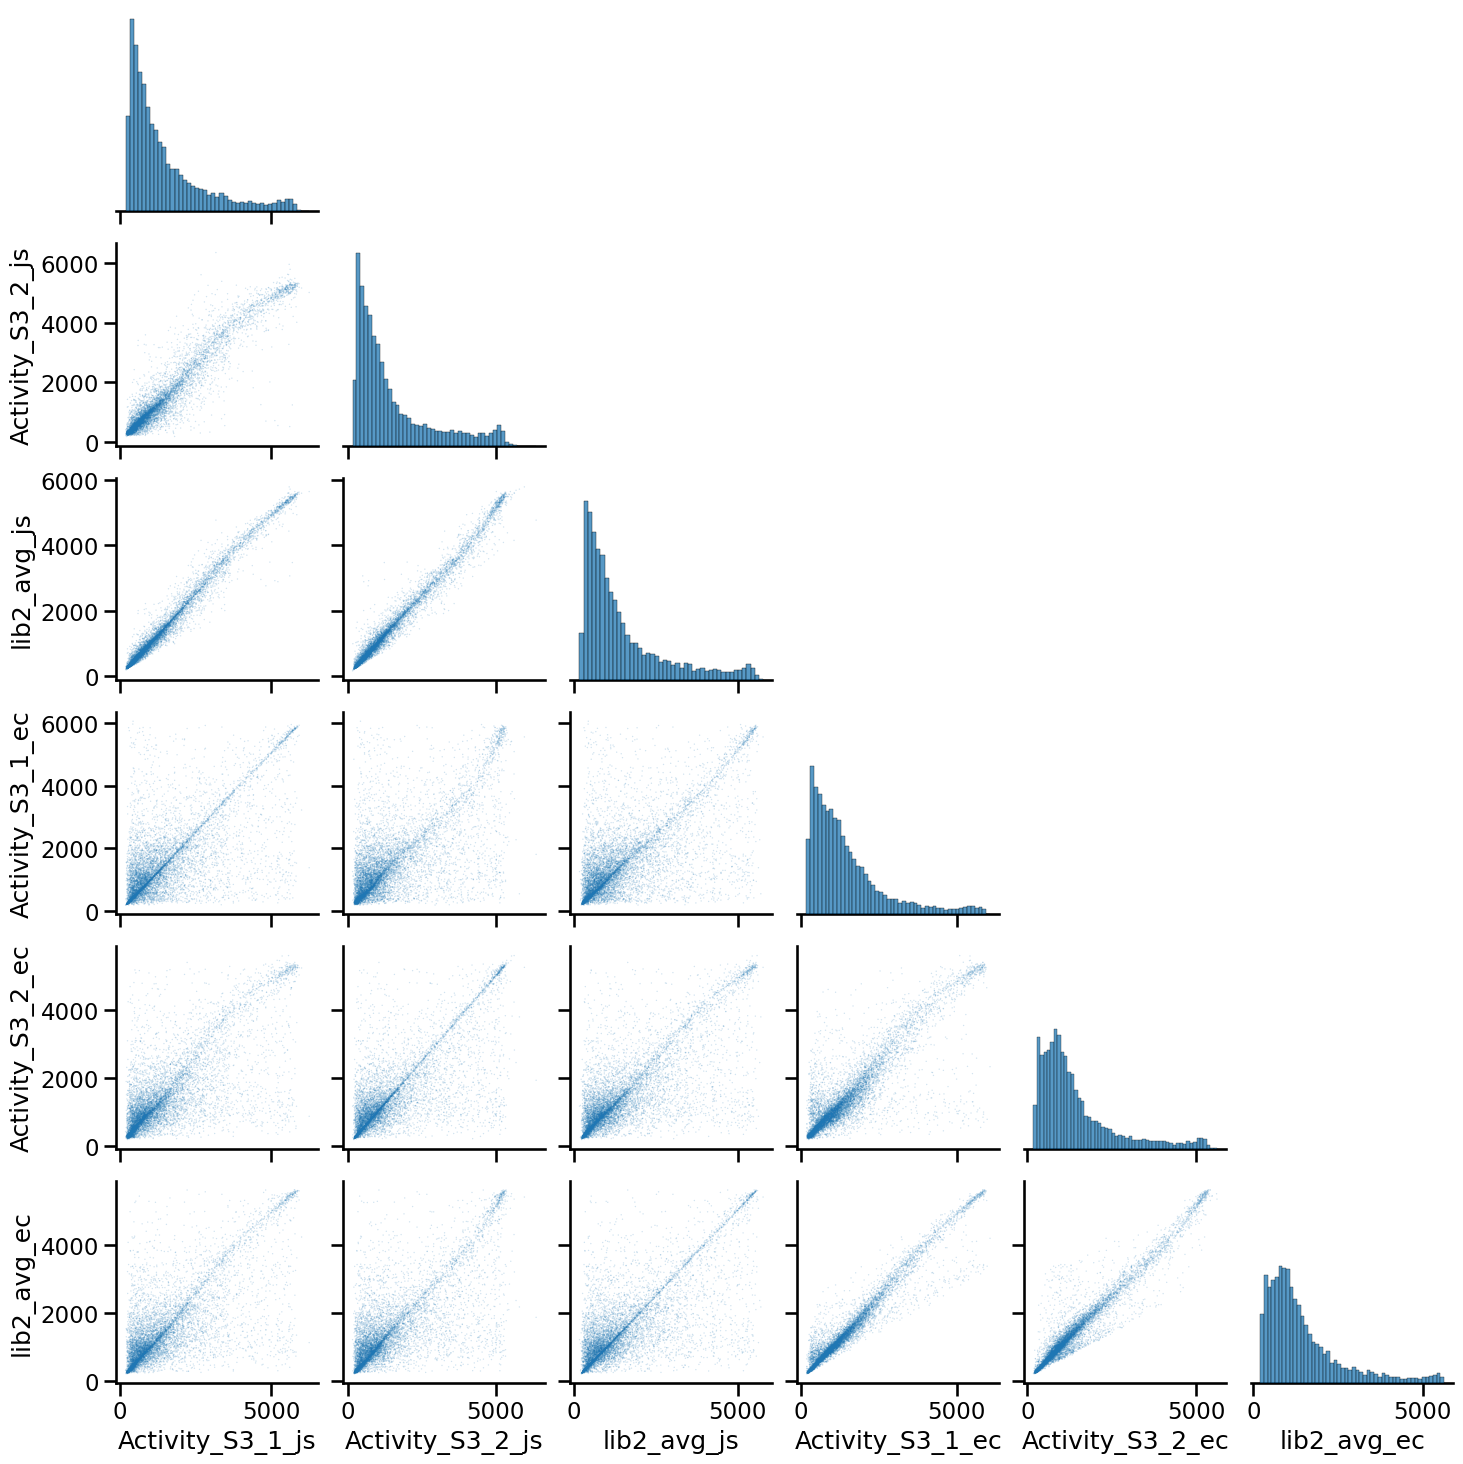

In [76]:
sns.set_context('talk')
sns.pairplot(both[["Activity_S3_1_js", "Activity_S3_2_js", "lib2_avg_js",
                   "Activity_S3_1_ec", "Activity_S3_2_ec", "lib2_avg_ec"]], 
             plot_kws = {'s' : 1, 'edgecolor' : 'none', 'alpha' : 0.2}, corner = True,)

In [83]:
def plot_correl(x, y, data = both):
    sns.set_context('talk')
    df = both.dropna(subset = [x, y])
    sns.scatterplot(data = df, x = x, y = y, s = 4, alpha = 0.1, edgecolor = 'none')
    plt.text(x = 6000, y = 300, 
             s = "Pearson\ncorrelation:\n" + str(pearsonr(x = df[x], y = df[y])[0])[:5],
            ha = "center", color = "red")
    sns.despine()

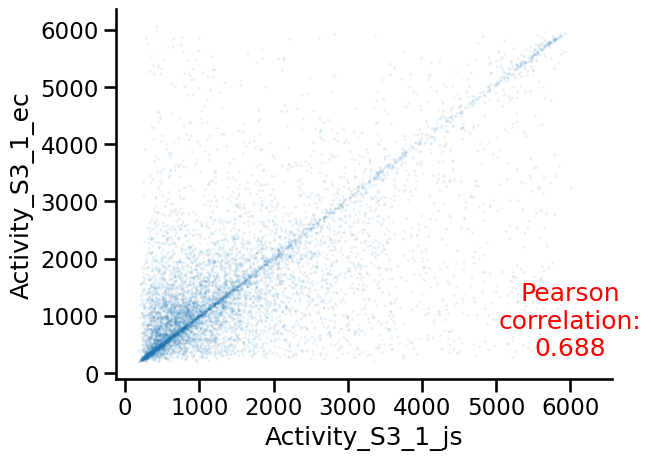

In [84]:
plot_correl("Activity_S3_1_js", "Activity_S3_1_ec")

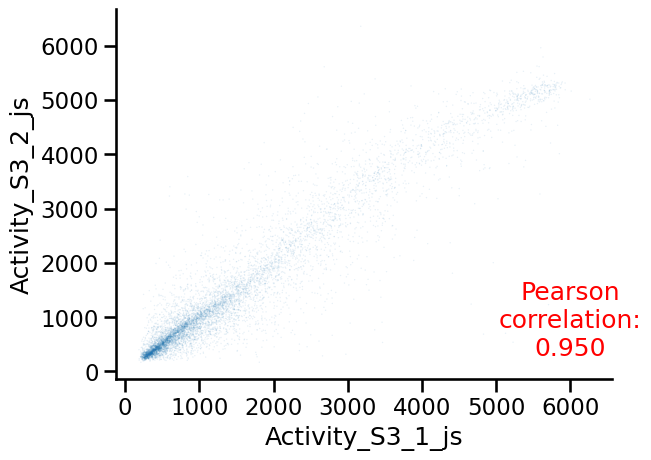

In [77]:
plot_correl("Activity_S3_1_js", "Activity_S3_2_js")

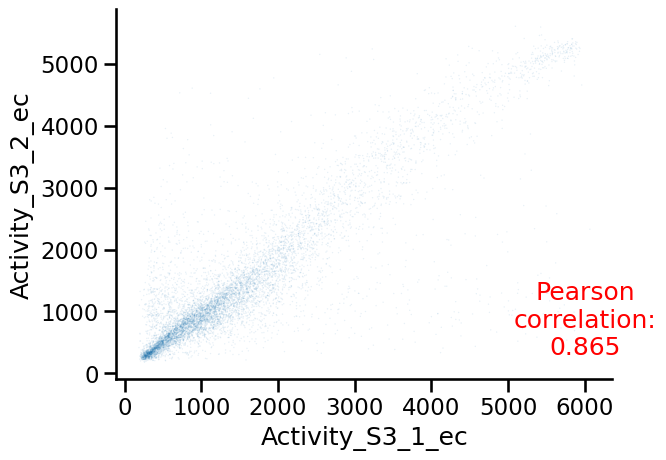

In [78]:
plot_correl("Activity_S3_1_ec", "Activity_S3_2_ec")

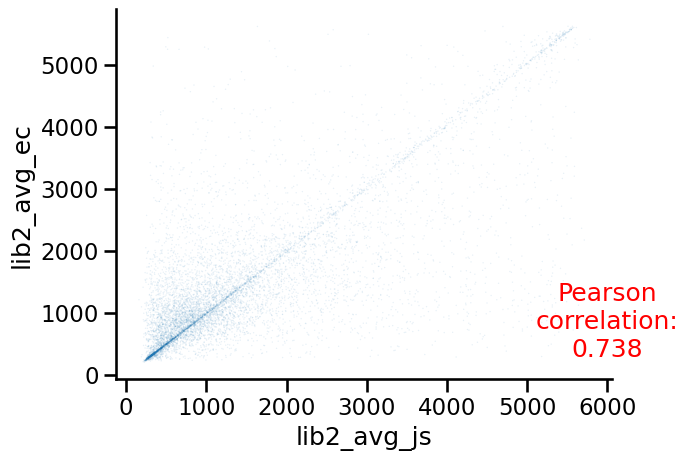

In [79]:
plot_correl("lib2_avg_js", "lib2_avg_ec")

In [44]:
library = pd.read_excel("../margot_raw/SeqLib_Visit2_2023.xlsx", sheet_name = "Visit2")
library = library[["ProteinSeq", "Description", "Other"]]
library["Description"] = library["Description"].astype(str)
library

,ProteinSeq,Description,Other
0,STIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPNNNGF,AD1_0,GAL4_AD1_0
1,STIPLDAMPRDALHGADASEEDDMSDGLPALKTDPNNNGA,AD1_Aro2A_0,GAL4_AD1_Aro2A_0
2,STIPADFMPRDAAHGFDWSEEDDMSDGAPFAKTDPNNNGF,AD1_L2A_0,GAL4_AD1_L2A_0
3,STDSTPMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADK,CAAD40_0,GCN4_CAAD40_0
4,STDSTPMFEYENLEDNSKEATSAADNDIPVTTDDVSLADK,CAAD40_WLF_A_0,GCN4_CAAD40_WLF_A_0
...,...,...,...
23344,EALSLCDDLDDEQDREENTNSGSLKDKQPCIADYAHLGPE,37_PSvsCHA_hyperE_DD_all,/
23345,DEQDREEDTNSGSLKDKQPCIADYAHLGPEDFKRDLEECQ,38_PSvsCHA_hyperE_DD_all,/
23346,IADYAHLGPEDFKRDLEECQKIVLDPSNDEDDEPPEDRDE,40_PSvsCHA_hyperE_DD_all,Pro subst
23347,DFKRDLEECQKIVLDPSNDEDDEPPEFRDEQDEFDEQDDF,41_PSvsCHA_hyperE_DD_all,Pro subst


In [45]:
library[library["Description"].str.contains("Basic")]

,ProteinSeq,Description,Other
304,MKILPVGSRFCPTDLGLVRLYLRNKVERNQSSFITTMDIH,Basic6.1,Q9LR74
305,CPTDLGLVRLYLRNKVERNQSSFITTMDIHQDYPWLLPHV,Basic6.2,Q9LR74
306,YLRNKVERNQSSFITTMDIHQDYPWLLPHVNNPLFNNNEW,Basic6.3,Q9LR74
307,SSFITTMDIHQDYPWLLPHVNNPLFNNNEWYYFVPLTERG,Basic6.4,Q9LR74
308,QDYPWLLPHVNNPLFNNNEWYYFVPLTERGGKILSVHRKV,Basic6.5,Q9LR74
...,...,...,...
13165,GSQDREENTNSGSLKDKQPCIADYAHLGPEDFKRDLEECQ,BasicArTh.38,Q6NQK2
13166,SGSLKDKQPCIADYAHLGPEDFKRDLEECQKIVLDPSNIE,BasicArTh.39,Q6NQK2
13167,IADYAHLGPEDFKRDLEECQKIVLDPSNIELDTPPEFRLS,BasicArTh.40,Q6NQK2
13168,DFKRDLEECQKIVLDPSNIELDTPPEFRLSQLEFGSQDSF,BasicArTh.41,Q6NQK2
